20180490 이재헌 컴퓨터 통계 HW2

Q4-14

a)

In [ ]:
# pip install ISLP

In [ ]:
# !pip uninstall -y numpy
# !pip uninstall -y setuptools
# !pip install setuptools
# !pip install numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from google.colab import drive
drive.mount('/content/drive')

Auto = pd.read_csv('/content/drive/MyDrive/ISLP/Auto.csv', na_values=['?'])
Auto_new = Auto.dropna()
Auto = Auto_new
Auto.index = range(len(Auto))
Auto.shape

Mounted at /content/drive


(392, 9)

In [ ]:
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA , QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy import stats

In [ ]:
Auto['mpg01'] =  (Auto['mpg']>= np.median(Auto['mpg'])) * 1

In [ ]:
Auto['mpg01']

0      0
1      0
2      0
3      0
4      0
      ..
387    1
388    1
389    1
390    1
391    1
Name: mpg01, Length: 392, dtype: int64

In [ ]:
#pd.plotting.scatter_matrix(Auto, alpha=0.2)

b)

Text(0, 0.5, 'mpg')

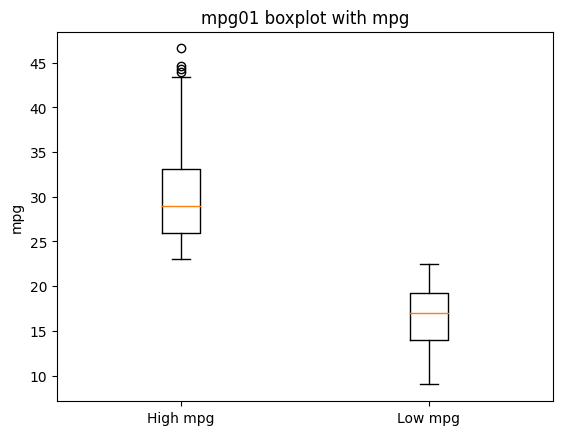

In [ ]:
mpg_above_med = (Auto['mpg'] >= np.median(Auto['mpg'])) * Auto['mpg']
mpg_above_med = mpg_above_med.drop(mpg_above_med[mpg_above_med == 0].index)
#df = df.drop(df[df.score < 50].index)
mpg_below_med = (Auto['mpg'] < np.median(Auto['mpg'])) * Auto['mpg']
mpg_below_med = mpg_below_med.drop(mpg_below_med[mpg_below_med == 0].index)

fig1, ax1 = plt.subplots()
ax1.boxplot([mpg_above_med, mpg_below_med])
plt.title('mpg01 boxplot with mpg')
plt.xticks([1, 2], ['High mpg', 'Low mpg'])
plt.ylabel('mpg')

Text(0, 0.5, 'displacement')

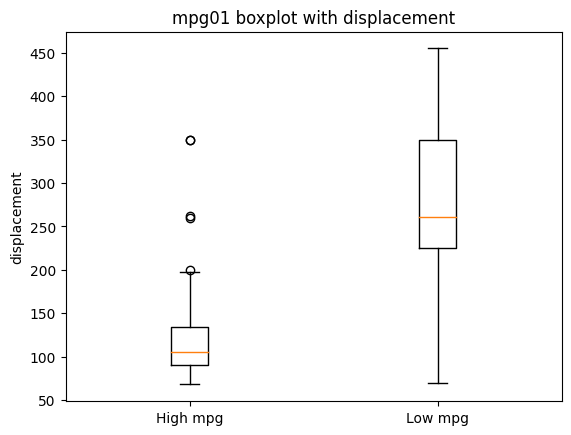

In [ ]:
mpg_above_med = (Auto['mpg'] >= np.median(Auto['mpg'])) * Auto['displacement']
mpg_above_med = mpg_above_med.drop(mpg_above_med[mpg_above_med == 0].index)
#df = df.drop(df[df.score < 50].index)
mpg_below_med = (Auto['mpg'] < np.median(Auto['mpg'])) * Auto['displacement']
mpg_below_med = mpg_below_med.drop(mpg_below_med[mpg_below_med == 0].index)

fig1, ax1 = plt.subplots()
ax1.boxplot([mpg_above_med, mpg_below_med])
plt.title('mpg01 boxplot with displacement')
plt.xticks([1, 2], ['High mpg', 'Low mpg'])
plt.ylabel('displacement')

Text(0, 0.5, 'horsepower')

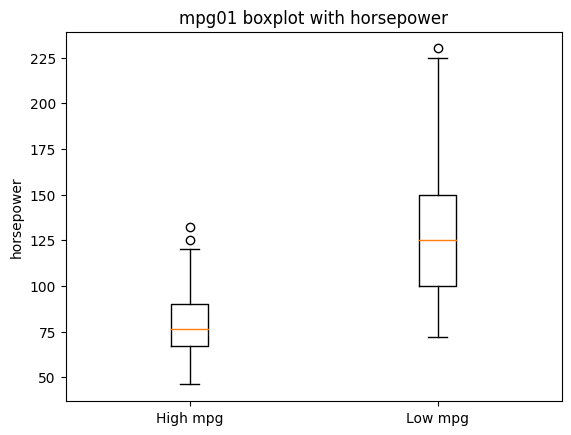

In [ ]:
mpg_above_med = (Auto['mpg'] >= np.median(Auto['mpg'])) * Auto['horsepower']
mpg_above_med = mpg_above_med.drop(mpg_above_med[mpg_above_med == 0].index)
#df = df.drop(df[df.score < 50].index)
mpg_below_med = (Auto['mpg'] < np.median(Auto['mpg'])) * Auto['horsepower']
mpg_below_med = mpg_below_med.drop(mpg_below_med[mpg_below_med == 0].index)

fig1, ax1 = plt.subplots()
ax1.boxplot([mpg_above_med, mpg_below_med])
plt.title('mpg01 boxplot with horsepower')
plt.xticks([1, 2], ['High mpg', 'Low mpg'])
plt.ylabel('horsepower')

Text(0, 0.5, 'weight')

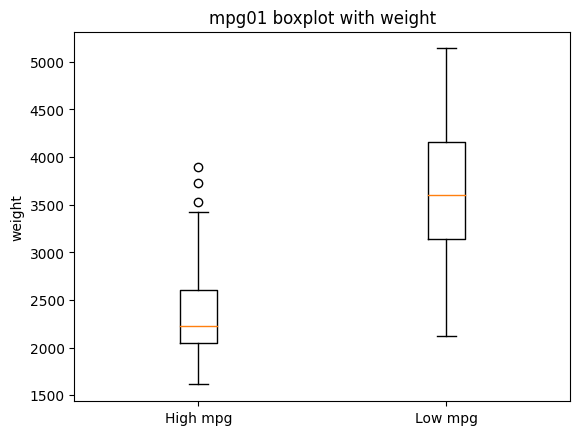

In [ ]:
mpg_above_med = (Auto['mpg'] >= np.median(Auto['mpg'])) * Auto['weight']
mpg_above_med = mpg_above_med.drop(mpg_above_med[mpg_above_med == 0].index)
#df = df.drop(df[df.score < 50].index)
mpg_below_med = (Auto['mpg'] < np.median(Auto['mpg'])) * Auto['weight']
mpg_below_med = mpg_below_med.drop(mpg_below_med[mpg_below_med == 0].index)

fig1, ax1 = plt.subplots()
ax1.boxplot([mpg_above_med, mpg_below_med])
plt.title('mpg01 boxplot with weight')
plt.xticks([1, 2], ['High mpg', 'Low mpg'])
plt.ylabel('weight')

Text(0, 0.5, 'acceleration')

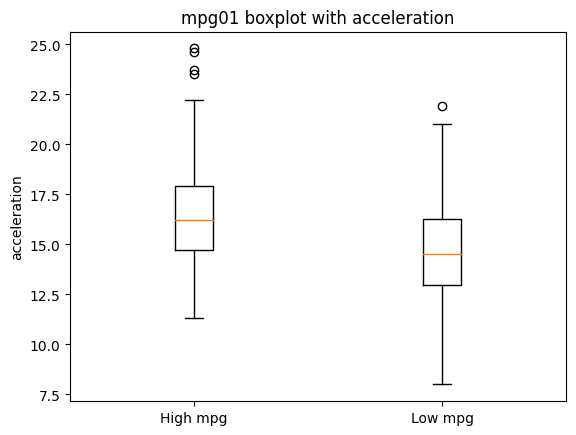

In [ ]:
mpg_above_med = (Auto['mpg'] >= np.median(Auto['mpg'])) * Auto['acceleration']
mpg_above_med = mpg_above_med.drop(mpg_above_med[mpg_above_med == 0].index)
#df = df.drop(df[df.score < 50].index)
mpg_below_med = (Auto['mpg'] < np.median(Auto['mpg'])) * Auto['acceleration']
mpg_below_med = mpg_below_med.drop(mpg_below_med[mpg_below_med == 0].index)

fig1, ax1 = plt.subplots()
ax1.boxplot([mpg_above_med, mpg_below_med])
plt.title('mpg01 boxplot with acceleration')
plt.xticks([1, 2], ['High mpg', 'Low mpg'])
plt.ylabel('acceleration')

In [ ]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.500000
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.500639
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


c)

In [ ]:
Auto_train, Auto_test = train_test_split(Auto, test_size=0.5, random_state = 15)

d) LDA

In [ ]:
lda = LDA(store_covariance=True)

In [ ]:
X_train = Auto_train[['displacement','horsepower','weight','acceleration']]
y_train = Auto_train['mpg01']
X_test = Auto_test[['displacement','horsepower','weight','acceleration']]
y_test = Auto_test['mpg01']
model_LDA = lda.fit(X_train, y_train)
model_LDA.coef_

array([[-0.01415463, -0.00553982, -0.0022429 , -0.09654836]])

In [ ]:
y_pred_LDA = model_LDA.predict(X_test)
error_LDA = 1-(y_pred_LDA == y_test).mean()
print('LDA test error rate = ', error_LDA)

LDA test error rate =  0.10204081632653061


e) QDA

In [ ]:
qda = QDA(store_covariance=True)

In [ ]:
model_QDA = qda.fit(X_train, y_train)
#model_QDA.coef_
y_pred_QDA = model_QDA.predict(X_test)
error_QDA = 1-(y_pred_QDA == y_test).mean()
print('QDA test error rate = ', error_QDA)

QDA test error rate =  0.09693877551020413


f) Logistic Regression

In [ ]:
lr = LogisticRegression(C=10**6, tol=1e-6)
model_LR = lr.fit(X_train, y_train)
model_LR.coef_

array([[-0.01122575,  0.02710172, -0.00267774,  0.43779072]])

In [ ]:
y_pred_LR = model_LR.predict(X_test)
error_LR = 1-(y_pred_LR == y_test).mean()
print('Logistic Regression test error rate = ', error_LR)

Logistic Regression test error rate =  0.09693877551020413


g) Naive Bayes

In [ ]:
NB = GaussianNB()
model_NB = NB.fit(X_train, y_train)
y_pred_NB = model_NB.predict(X_test)
error_NB = 1-(y_pred_NB == y_test).mean()
print('Naive Bayes test error rate = ', error_NB)

Naive Bayes test error rate =  0.09183673469387754


h) KNN

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train , y_train)
knn1_pred = knn1.predict(X_test)
#confusion_matrix(knn1_pred , y_test)
error_KNN1 = 1-(knn1_pred == y_test).mean()
print('KNN with k = 1 test error rate = ', error_KNN1)

KNN with k = 1 test error rate =  0.16836734693877553


In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train , y_train)
knn5_pred = knn5.predict(X_test)
#confusion_matrix(knn1_pred , y_test)
error_KNN5 = 1-(knn5_pred == y_test).mean()
print('KNN with k = 5 test error rate = ', error_KNN5)

KNN with k = 5 test error rate =  0.1071428571428571


In [ ]:
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train , y_train)
knn10_pred = knn10.predict(X_test)
#confusion_matrix(knn1_pred , y_test)
error_KNN10 = 1-(knn10_pred == y_test).mean()
print('KNN with k = 10 test error rate = ', error_KNN10)

KNN with k = 10 test error rate =  0.11224489795918369


Q5-2

g)

<ipython-input-26-7e48c36e4107>:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, n);


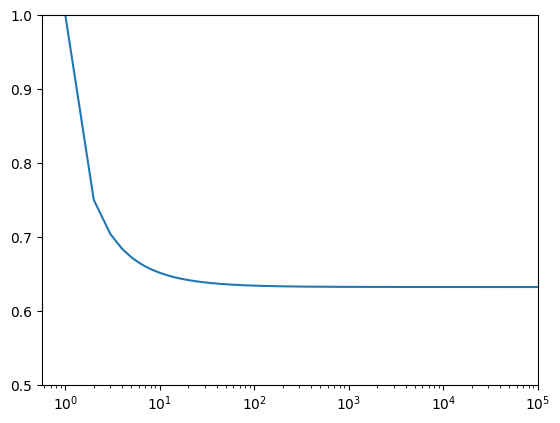

In [ ]:
n = 100000   # Number of observations
prob = [1 - (1-1/n)**n for n in range(1, n)]

plt.semilogx(range(1,n),prob);
plt.xlim(0, n);
plt.ylim(.5,1);

h)

In [ ]:
rng = np.random.default_rng (10)
store = np.empty (10000)
for i in range (10000):
  store[i] = 4 in random.choices(range(100), k=100)
np.mean(store)

0.64

Q6-5)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ISLP/Default.csv', na_values=['?'])
df['default_yes'] = (df['default'] == 'Yes').astype('int')
df.head()

,default,student,balance,income,default_yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


a)

In [ ]:
X = df[['income','balance']]
y = df['default_yes']
model_LR = lr.fit(X, y)
print(model_LR.coef_)
y_pred_LR = model_LR.predict(X)
error_LR = 1-(y_pred_LR == y).mean()
print('Logistic Regression test error rate = ', error_LR)

[[2.08089921e-05 5.64710291e-03]]
Logistic Regression test error rate =  0.02629999999999999


b)

i)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 4)

ii)

In [ ]:
mod = lr.fit(X_train, y_train)
mod.coef_

array([[2.47383350e-05, 5.49074745e-03]])

In [ ]:
xx, yy = np.mgrid[0:80000:100, -100:3000:10]
grid = np.c_[xx.ravel(), yy.ravel()]                    # https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
probs = mod.predict_proba(grid)[:, 1].reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


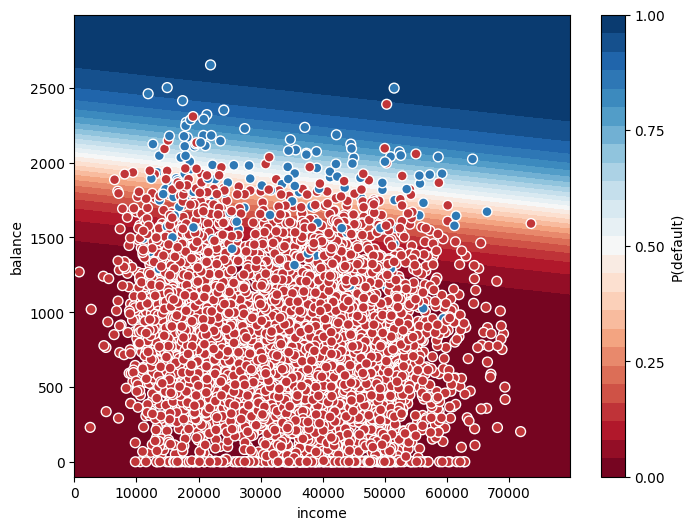

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",    # 25 levels
                     vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("P(default)")
ax_c.set_ticks([0,0.25,0.5,0.75,1])

ax.scatter(X_test['income'], X_test['balance'], c=y_test, s=50,
          cmap="RdBu", vmin=-0.2, vmax=1.2,
          edgecolor="white", linewidth=1)

ax.set(xlabel="income", ylabel="balance");

iii)

c)

In [ ]:
y_pred = mod.predict(X_test)
1-(y_pred == y_test).mean()

0.023800000000000043

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 7)
mod = lr.fit(X_train, y_train)
y_pred = mod.predict(X_test)
1-(y_pred == y_test).mean()

0.02639999999999998

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 11)
mod = lr.fit(X_train, y_train)
y_pred = mod.predict(X_test)
1-(y_pred == y_test).mean()

0.024800000000000044

In [ ]:
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."

    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.4f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.4f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.4f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.4f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.4f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

<ipython-input-37-c573c20b9cbc>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(class_labels + [''],rotation=90)


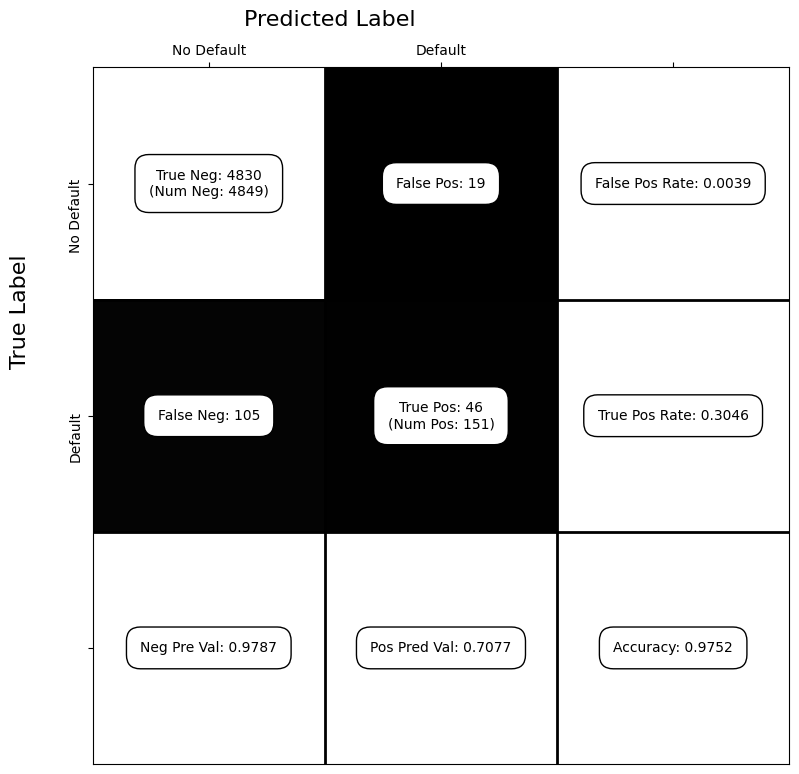

In [ ]:
C = confusion_matrix(y_test, y_pred)
show_confusion_matrix(C, ['No Default', 'Default'])

d)

In [ ]:
df['student_yes'] = (df['student'] == 'Yes').astype('int')

In [ ]:
X = df[['income','balance','student_yes']]
y = df['default_yes']
model_LR = lr.fit(X, y)
print(model_LR.coef_)
y_pred_LR = model_LR.predict(X)
error_LR = 1-(y_pred_LR == y).mean()
print('Logistic Regression test error rate = ', error_LR)

[[-1.34958486e-04  4.16320936e-03 -3.97984700e+00]]
Logistic Regression test error rate =  0.03280000000000005


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 11)
mod = lr.fit(X_train, y_train)
y_pred = mod.predict(X_test)
1-(y_pred == y_test).mean()

0.0252

<ipython-input-37-c573c20b9cbc>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(class_labels + [''],rotation=90)


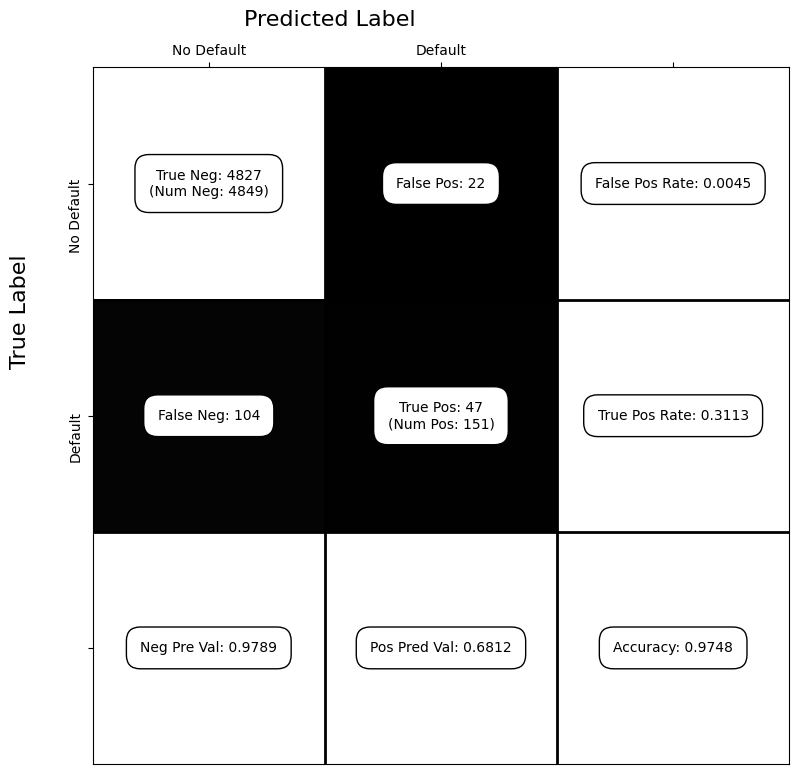

In [ ]:
C = confusion_matrix(y_test, y_pred)
show_confusion_matrix(C, ['No Default', 'Default'])

Q6-6)

a)

In [ ]:
np.random.seed(0) #asked in the exercise

In [ ]:
mod1 = smf.glm(formula='default ~ income + balance', data=df, family=sm.families.Binomial()).fit() #create & fit model
print(mod1.summary()) #show results

                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['default[No]', 'default[Yes]']   No. Observations:                10000
Model:                                         GLM   Df Residuals:                     9997
Model Family:                             Binomial   Df Model:                            2
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -789.48
Date:                             Wed, 04 Oct 2023   Deviance:                       1579.0
Time:                                     10:35:00   Pearson chi2:                 6.95e+03
No. Iterations:                                  9   Pseudo R-squ. (CS):             0.1256
Covariance Type:                         nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-

b)

In [ ]:
def boot_fn(default):
    mod1 = smf.glm(formula='default ~ income + balance', data=default, family=sm.families.Binomial()).fit()
    coef_income = mod1.params[1]
    coef_balance = mod1.params[2]
    return [coef_income, coef_balance]

In [ ]:
boot_fn(df)

[-2.0808975528986897e-05, -0.005647102950316492]

In [ ]:
#bootstrap function
def boot(X, bootSample_size=None):
    '''
    Sampling observations from a dataframe

    Parameters
    ------------
    X : pandas dataframe
        Data to be resampled

    bootSample_size: int, optional
        Dimension of the bootstrapped samples

    Returns
    ------------
    bootSample_X : pandas dataframe
        Resampled data

    Examples
    ----------
    To resample data from the X dataframe:
        >> boot(X)
    The resampled data will have length equal to len(X).

    To resample data from the X dataframe in order to have length 5:
        >> boot(X,5)

    References
    ------------
    http://nbviewer.jupyter.org/gist/aflaxman/6871948

    '''

    #assign default size if non-specified
    if bootSample_size == None:
        bootSample_size = len(X)

    #create random integers to use as indices for bootstrap sample based on original data
    bootSample_i = (np.random.rand(bootSample_size)*len(X)).astype(int)
    bootSample_i = np.array(bootSample_i)
    bootSample_X = X.iloc[bootSample_i]

    return bootSample_X

In [ ]:
#running model for bootstrapped samples
coefficients = [] #variable initialization
n = 100 #number of bootstrapped samples

for i in range(0,n):
    coef_i = boot_fn(boot(df)) #determining coefficients for specific bootstrapped sample
    coefficients.append(coef_i) #saving coefficients value

print(pd.DataFrame(coefficients).mean()) #print average of coefficients

0   -0.000021
1   -0.005716
dtype: float64


d)

Results (b): [-0.000021, -0.005647] = [-2.0808975528987073e-05, -0.005647102950316495]


Results (c): [-0.000021, -0.005672]


Results before : [2.08089921e-05 5.64710291e-03]

Q6-7

a)

In [ ]:
!pip install ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize , poly)
Weekly = load_data("Weekly")
Weekly.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 61.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=6f97602e5346be1c860804849f9028af18e7f8f716244e06a97e745d1c4ce307
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstal

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [ ]:
Weekly['Is_up'] = (Weekly['Direction'] == 'Up').astype('int')

In [ ]:
X = Weekly[['Lag1','Lag2']]
y = Weekly['Is_up']
model_LR = lr.fit(X, y)
print(model_LR.coef_)
y_pred_LR = model_LR.predict(X)
error_LR = 1-(y_pred_LR == y).mean()
print('Logistic Regression test error rate = ', error_LR)

[[-0.03872222  0.0602483 ]]
Logistic Regression test error rate =  0.4444444444444444


<ipython-input-37-c573c20b9cbc>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(class_labels + [''],rotation=90)


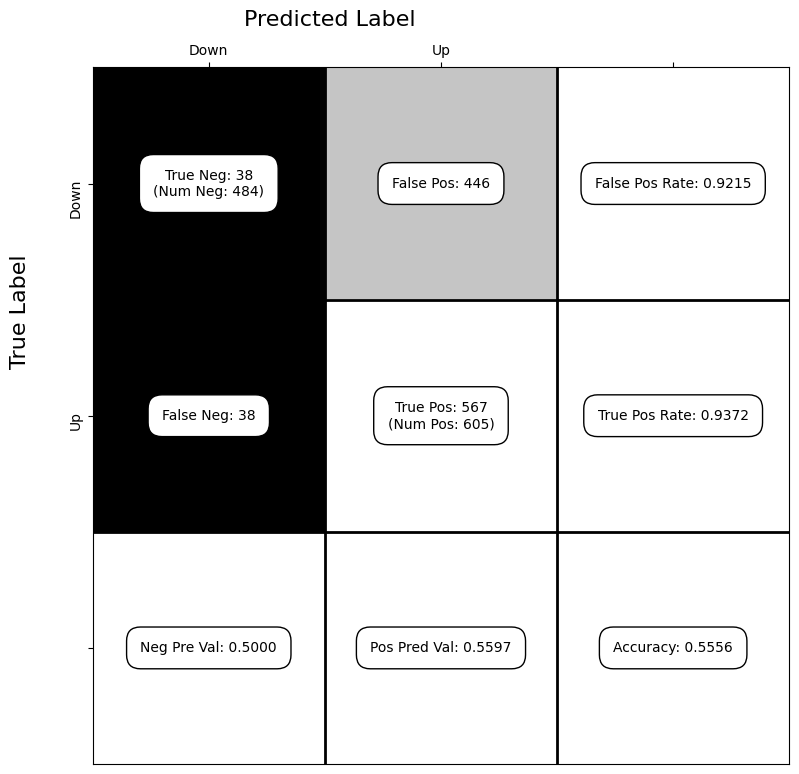

In [ ]:
C = confusion_matrix(y, y_pred_LR)
show_confusion_matrix(C, ['Down', 'Up'])

b)

In [ ]:
mod.fit(X, y)
print(mod.intercept_, mod.coef_, (mod.predict(X) == y).mean())  # accuracy
mod.fit(X.iloc[1:], y.iloc[1:])
print(mod.intercept_, mod.coef_, (mod.predict(X) == y).mean())

[0.22122405] [[-0.03872222  0.0602483 ]] 0.5555555555555556
[0.22324305] [[-0.03843317  0.06084763]] 0.5564738292011019


c)

In [ ]:
mod.predict([X.iloc[0].values]) == y[0]

array([False])

-> misclassified

d)

In [ ]:
n = len(Weekly)
pred_n = []
error_rate = 0

for i in range(n):
  X_wo_i = X.copy().drop(i)
  y_wo_i = y.copy().drop(i)
  mod_loop = mod.fit(X_wo_i.values,y_wo_i.values)
  pred_n.append(mod_loop.predict([X.iloc[i]]))
  pred_n[i].astype(int)
  if pred_n[i] != y[i]:
    error_rate += 1

error_rate /= n

print('error_rate =', error_rate)

error_rate = 0.44995408631772266
